## Examine sample file from shipboard real-time processed ADCP

This is a pre-cruise examination of the data file to see how to truncate it for sending to shore during the cruise.

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cftime


In [15]:
datapath = '../data/raw/shipboard_adcp_initial_look/'
file = datapath + 'wh300.nc'  

ds = xr.open_dataset(file,drop_variables=['amp','pg','pflag','num_pings','tr_temp'])


In [16]:
ds

<xarray.Dataset>
Dimensions:     (depth_cell: 70, time: 2917)
Coordinates:
  * time        (time) datetime64[ns] 2021-09-03T18:04:28 ... 2021-09-07T19:1...
Dimensions without coordinates: depth_cell
Data variables:
    trajectory  int32 ...
    lon         (time) float64 ...
    lat         (time) float64 ...
    depth       (time, depth_cell) float32 ...
    u           (time, depth_cell) float32 ...
    v           (time, depth_cell) float32 ...
    heading     (time) float32 ...
    uship       (time) float32 ...
    vship       (time) float32 ...
Attributes:
    featureType:            trajectoryProfile
    history:                Created: 2021-09-07 19:16:41 UTC
    Conventions:            COARDS
    software:               pycurrents
    hg_changeset:           3150:79a1ba33abbb
    title:                  Shipboard ADCP velocity profiles
    description:            Shipboard ADCP velocity profiles from oc2109a usi...
    cruise_id:              oc2109a
    sonar:                  wh300
    yearbase:               2021
    CODAS_variables:        \nVariables in this CODAS short-form Netcdf file ...
    CODAS_processing_note:  \nCODAS processing note:\n======================\...

In [17]:
ds2=ds.sel(time=slice("2021-09-06", "2021-09-07"))

In [18]:
ds2

<xarray.Dataset>
Dimensions:     (depth_cell: 70, time: 1299)
Coordinates:
  * time        (time) datetime64[ns] 2021-09-06T00:00:28 ... 2021-09-07T19:1...
Dimensions without coordinates: depth_cell
Data variables:
    trajectory  int32 -1148969885
    lon         (time) float64 -126.8 -126.8 -126.8 ... -124.1 -124.1 -124.1
    lat         (time) float64 44.65 44.65 44.65 44.65 ... 44.61 44.61 44.61
    depth       (time, depth_cell) float32 ...
    u           (time, depth_cell) float32 ...
    v           (time, depth_cell) float32 ...
    heading     (time) float32 87.3 87.24 87.49 87.4 ... 57.23 57.31 57.66 57.74
    uship       (time) float32 5.368 5.576 5.583 5.545 ... 4.219 4.422 4.328
    vship       (time) float32 0.06072 0.06902 0.04971 ... 2.39 2.422 2.438
Attributes:
    featureType:            trajectoryProfile
    history:                Created: 2021-09-07 19:16:41 UTC
    Conventions:            COARDS
    software:               pycurrents
    hg_changeset:           3150:79a1ba33abbb
    title:                  Shipboard ADCP velocity profiles
    description:            Shipboard ADCP velocity profiles from oc2109a usi...
    cruise_id:              oc2109a
    sonar:                  wh300
    yearbase:               2021
    CODAS_variables:        \nVariables in this CODAS short-form Netcdf file ...
    CODAS_processing_note:  \nCODAS processing note:\n======================\...

In [11]:
ds2.to_netcdf(datapath + 'wh300_last_day.nc')

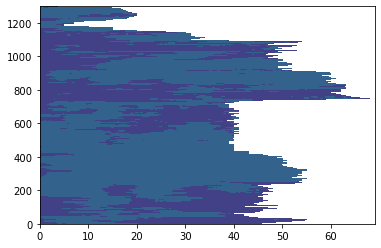

In [24]:
fig = plt.figure()
plt.contourf(ds2.u)
# plt.plot(ds2.uship)